In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path

In [2]:
DATA_PATH = Path("/kaggle/input/nslkdd/KDDTrain+_20Percent.txt")
COLNAMES = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty']

In [3]:

df = pd.read_csv(DATA_PATH, names=COLNAMES, header=None)
df['label'] = df['label'].astype(str).str.strip()  # minimal clean
df['attack_binary'] = np.where(df['label']=='normal','normal','attack')

print("Shape:", df.shape)
print(df.head(3))

Shape: (25192, 44)
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.03   
1               0       0    0  ...                    0.60   
2               0       0    0  ...                    0.05   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                          0.0   
1                         0.88                          0.0   
2                         0.00                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  0.05   
1                   0.0             

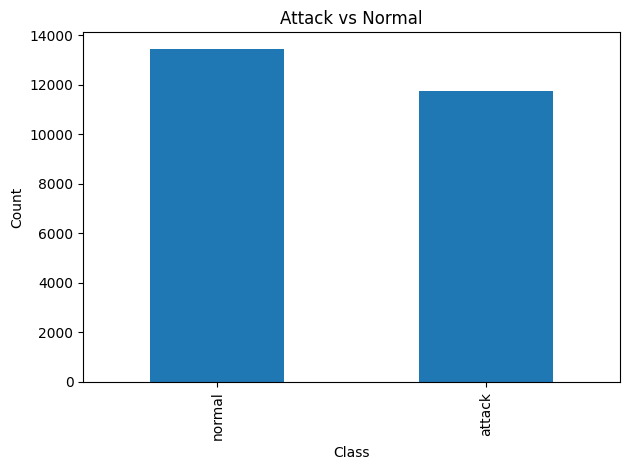

In [4]:
# Visual 1: Binary class balance
plt.figure()
df['attack_binary'].value_counts().plot(kind='bar')
plt.title("Attack vs Normal"); plt.xlabel("Class"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

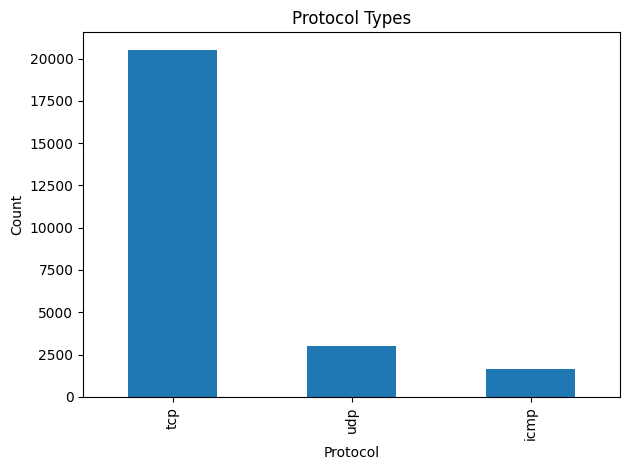

In [5]:
# Visual 2: Protocol distribution (quick look)
plt.figure()
df['protocol_type'].value_counts().plot(kind='bar')
plt.title("Protocol Types"); plt.xlabel("Protocol"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

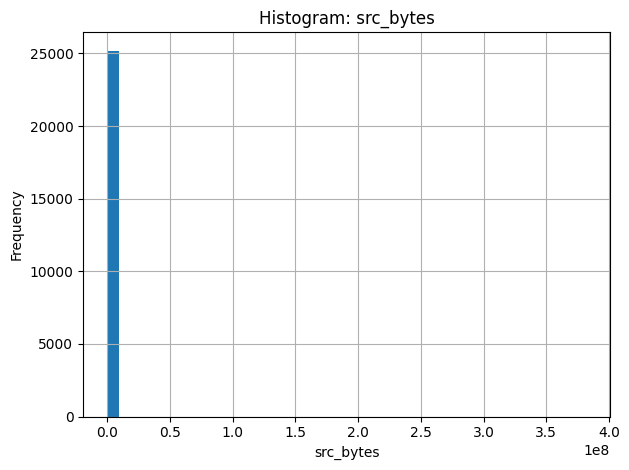

In [6]:
# Visual 3: A simple numeric histogram
plt.figure()
df['src_bytes'].hist(bins=40)
plt.title("Histogram: src_bytes"); plt.xlabel("src_bytes"); plt.ylabel("Frequency"); plt.tight_layout(); plt.show()